In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from os import listdir
import numpy as np
import math

In [9]:
df = pd.read_csv('data/ice/{}/{}'.format('newData', '219.csv'))
df.head()


,origId,iceLabel,d,T,Points:0,Points:1,Points:2,cluster,nodeCluster
0,3732,1,1.000200e-07,228.61,5.1996,0.407980,-0.000002,9,80
1,3732,1,1.000200e-07,228.61,5.1996,0.401782,0.070843,9,80
2,3732,1,1.000200e-07,228.61,5.1996,0.383376,0.139536,9,80
3,3732,1,1.000200e-07,228.61,5.1996,0.353322,0.203989,9,80
4,3732,1,1.000200e-07,228.61,5.1996,0.312532,0.262243,9,80


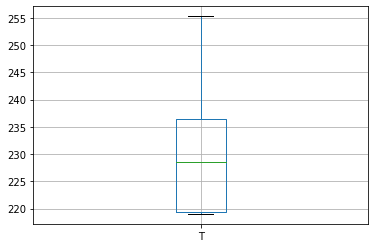

In [10]:
boxplot = df.boxplot(column=['T']) 

In [11]:
t = df['T'].to_numpy()
t = np.sort(t)
print(t)
print(min(t))
print(max(t))
print("Q1 quantile of t : ", np.quantile(t, .20))
print("Q2 quantile of t : ", np.quantile(t, .50))
print("Q3 quantile of t : ", np.quantile(t, .75))
print("100th quantile of t : ", np.quantile(t, .1)) 

[219.02 219.02 219.02 ... 255.27 255.27 255.27]
219.02
255.27
Q1 quantile of t :  219.2
Q2 quantile of t :  228.47
Q3 quantile of t :  236.37
100th quantile of t :  219.09


In [12]:
# folders = ['3-28-22']
t = []
d_mm = []
name = []
domain = []
folders = [f for f in listdir("data/ice/")]
print(folders)
for folder in folders:
    onlyfiles = [f for f in listdir("data/ice/{}".format(folder)) ]
    print(onlyfiles)
    for file in onlyfiles:
        df = pd.read_csv('data/ice/{}/{}'.format(folder,file))
        domain.append('{}_{}'.format(folder, file))
        for index, row in df.iterrows():
            t.append(row['T'])
            d_mm.append(row['d'] * math.pow(10, 6))
            name.append('{}_{}'.format(folder, file))

['3-28-22', 'newData']
['210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv']
['210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv', '218.csv', '219.csv']


In [13]:
dct = {'name' : name, 'T' : t, 'd_mm': d_mm}

In [14]:
data = pd.DataFrame(dct)

In [15]:
data.head()

,name,T,d_mm
0,3-28-22_210.csv,233.98,0.032775
1,3-28-22_210.csv,233.98,0.032775
2,3-28-22_210.csv,233.98,0.032775
3,3-28-22_210.csv,233.98,0.032775
4,3-28-22_210.csv,233.98,0.032775


In [16]:
data.to_csv('ioData.csv', index=False)

In [17]:
domain

['3-28-22_210.csv',
 '3-28-22_211.csv',
 '3-28-22_212.csv',
 '3-28-22_213.csv',
 '3-28-22_214.csv',
 '3-28-22_215.csv',
 '3-28-22_216.csv',
 '3-28-22_217.csv',
 'newData_210.csv',
 'newData_211.csv',
 'newData_212.csv',
 'newData_213.csv',
 'newData_214.csv',
 'newData_215.csv',
 'newData_216.csv',
 'newData_217.csv',
 'newData_218.csv',
 'newData_219.csv']

In [18]:
total = []
ice = []
name = []
domain = []
folders = [f for f in listdir("data/ice-nonice/")]
print(folders)
for folder in folders:
    onlyfiles = [f for f in listdir("data/ice-nonice/{}".format(folder)) ]
    print(onlyfiles)
    for file in onlyfiles:
        df = pd.read_csv('data/ice-nonice/{}/{}'.format(folder,file))
        domain.append('{}_{}'.format(folder, file))
        total.append(len(df["iceLabel"].to_list()))
        icedf = df[df.iceLabel == 1]
        ice.append(len(icedf['iceLabel'].to_list()))

['3-28-22', 'newData']
['210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv']
['210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv', '218.csv', '219.csv']


In [19]:
dct = {'name' : domain, 'total' : total, 'ice': ice}
data = pd.DataFrame(dct)
data.head()


,name,total,ice
0,3-28-22_210.csv,102638,22838
1,3-28-22_211.csv,100586,22686
2,3-28-22_212.csv,102182,23256
3,3-28-22_213.csv,101840,23446
4,3-28-22_214.csv,102106,23598


In [20]:
data.to_csv('particleInfo.csv', index=False)

In [21]:
print(min(total), max(total))
print(min(ice), max(ice))

92302 102638
7068 24472
